# Classification

This data set consists of percentage returns for the S&P 500 stock index over 1, 250 days, from the
beginning of 2001 until the end of 2005. For each date, we have recorded the percentage returns for each of the five previous trading days, Lag1 through Lag5.  Volume (the number of shares traded on the previous day, in billions), Today (the percentage return on the date in question) and Direction (whether the market was Up or Down on this
date). Our goal is to predict Direction (a qualitative response) using the other features.

In [139]:
library(ISLR2)


# Preview of Columns
names(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [140]:
# Dimensions of Dataset

dim(Smarket)

[1] 1250    9

In [141]:
# Summary of the dataset

summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [142]:
# Pairwise Correlation on all numeric data

cor(Smarket[, -9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


Correlations between the lag variables and today’s returns are close to zero. There appears to be little
correlation between today’s returns and previous days’ returns. The only substantial correlation is between Year and Volume.

The following objects are masked from Smarket (pos = 9):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 11):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



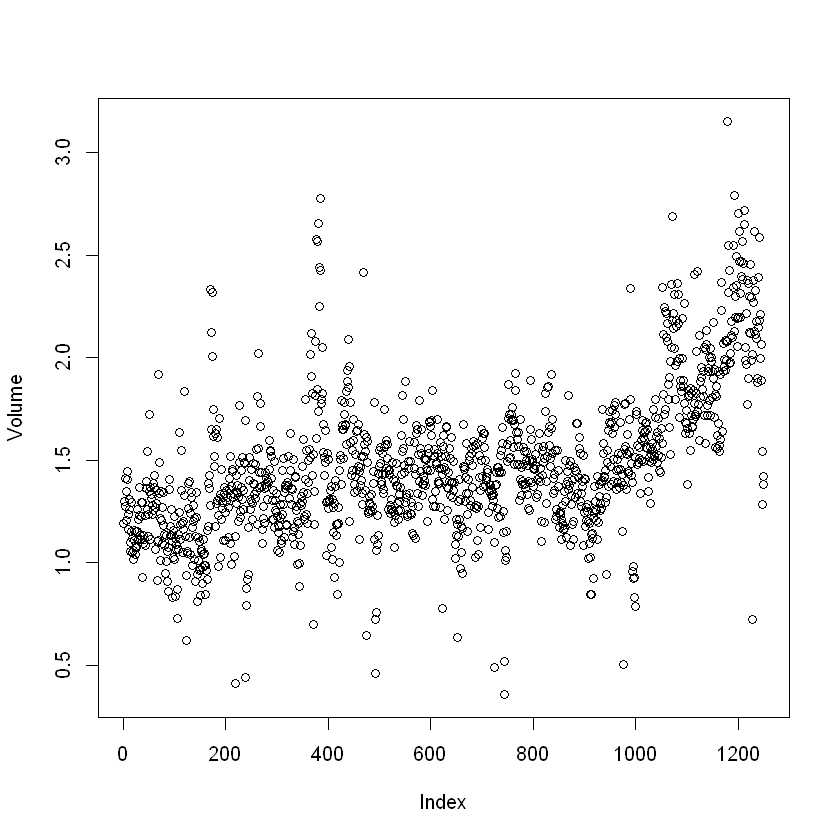

In [143]:
# Visualizing increasing Volume

attach(Smarket)
plot(Volume)

In [144]:
# Verify the Implicitly coded directions
contrasts(Smarket$Direction)

,Up
Down,0
Up,1


## Logistic Regression


In general, we can perform a regression by modeling the response Y as coming from a particular member of the exponential family (Gaussian, Poisson, Bernoulli), and then transforming the mean of the response so that the transformed mean is a linear function of the predictors. Any regression approach that follows this very general recipe is known as a generalized linear model (GLM). Thus, linear regression, logistic generalized regression, and Poisson regression are three examples of GLMs. Other examples include Gamma regression and negative binomial regression.

In [145]:
# Running a logistic regression using the generalized linear model (glm)

glm_fit <- glm(
    Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, 
    data = Smarket,
    family = binomial
)

summary(glm_fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


The smallest p-value here is associated with Lag1. The negative coefficient for this predictor suggests that if the market had a positive return yesterday, then it is less likely to go up today. However, at a value of 0.15, the p-value is still relatively large, and so there is no clear evidence of a real association between Lag1 and Direction.

### Prediction with Logistic Regression Model

The predict() function can be used to predict the probability that the market will go up, given values of the predictors. The type = "response" option tells R to output probabilities of the form P(Y = 1|X), as opposed to other information such as the logit. If no dataset is supplied, predict() function, then the probabilities are computed for the training data that was used to fit the logistic regression model.

In [146]:
# Prediction with Logistic Regression Model

glm_probs <- predict(glm_fit, type = "response")

glm_probs[1:10]

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

To make a prediction as to whether the market will go up or down on a particular day, we must convert these predicted probabilities into class labels, Up or Down. The following two commands create a vector of class predictions based on whether the predicted probability of a market increase is greater than or less than 0.5.

In [147]:
# Create a Default Vector of Down with length = number
# of rows in the Smarket Dataset
glm_pred <- rep("Down", nrow(Smarket))

# For Probabilites > 0.5, pred = "Up"
glm_pred[glm_probs > 0.5] = "Up"

# Create a confusion matrix from the above
table(glm_pred, Direction)

        Direction
glm_pred Down  Up
    Down  145 141
    Up    457 507

The diagonal elements of the confusion matrix indicate correct predictions, while the off-diagonals represent incorrect predictions. Hence our model correctly predicted that the market would go up on 507 days and that it would go down on 145 days, for a total of 507 + 145 = 652 correct predictions. The mean() function can be used to compute the fraction of days for which the prediction was correct. In this case, logistic regression correctly predicted the movement of the market 52.2% of the time.

In [148]:
mean(glm_pred == Direction)

[1] 0.5216

At first glance, it appears that the logistic regression model is working a little better than random guessing. However, this result is misleading because we trained and tested the model on the same set of 1, 250 observations. In other words, *100% − 52.2% = 47.8%*, is the training error rate. The training error rate is often overly optimistic—it tends to underestimate the test error rate. In order to better assess the accuracy of the logistic regression model in this setting, we can fit the model using part of the data, and then examine how well it predicts the **held out** data.

To implement this strategy, we will first create a vector corresponding to the observations from 2001 through 2004. We will then use this vector to create a held out data set of observations from 2005.

In [149]:
# Creat a boolean filter using the Year Colum
train_index <- (Year < 2005)

# Select the Test Predictors 
smarket_test <- Smarket[!train_index,]

# Select the test Response
direction_test <- Direction[!train_index]

In [150]:
# Perform a logistic regression on the training subset
glm_fit2 <- glm(
    Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, 
    data = Smarket,
    family = binomial,
    subset = train_index
)

glm_probs2 <- predict(glm_fit2, smarket_test, type = "response")

Notice that we have trained and tested our model on two completely separate data sets: training was performed using only the dates before 2005, and testing was performed using only the dates in 2005. Finally, we compute the predictions for 2005 and compare them to the actual movements of the market over that time period.

In [151]:
# Default Resonse
glm_pred2 <- rep("Down", nrow(smarket_test))

# Now, if the predicted probability is greater than 0.5, Response = "Up"
glm_pred2[(glm_probs2 > 0.5)] = "Up"

# Output the Confusion Matrix
table(glm_pred2, direction_test)

         direction_test
glm_pred2 Down Up
     Down   77 97
     Up     34 44

In [152]:
# Find the Test error tate
mean(glm_pred2 != direction_test)

[1] 0.5198413

The results are rather disappointing: the test error rate is 52 %, which is worse than random guessing! Of course this result
is not all that surprising, given that one would not generally expect to be able to use previous days’ returns to predict future market performance.

> We recall that the logistic regression model had very underwhelming pvalues associated with all of the predictors, and that the smallest p-value, though not very small, corresponded to Lag1. Perhaps by removing the variables that appear not to be helpful in predicting Direction, we can obtain a more effective model. After all, using predictors that have no relationship with the response tends to cause a deterioration in the test error rate (since such predictors cause an increase in variance without a corresponding decrease in bias), and so removing such predictors may in turn yield an improvement.

In [153]:
# Perform a logistic regression on the training subset
glm_fit3 <- glm(
    Direction ~ Lag1 + Lag2, 
    data = Smarket,
    family = binomial,
    subset = train_index
)

glm_probs3 <- predict(glm_fit3, smarket_test, type = "response")

# Default Resonse
glm_pred3 <- rep("Down", nrow(smarket_test))

# Now, if the predicted probability is greater than 0.5, Response = "Up"
glm_pred3[(glm_probs3 > 0.5)] = "Up"

# Output the Confusion Matrix
table(glm_pred3, direction_test)

# Find the Test error tate
mean(glm_pred3 != direction_test)

         direction_test
glm_pred3 Down  Up
     Down   35  35
     Up     76 106

[1] 0.4404762

Now the results appear to be a little better: 56% of the daily movements have been correctly predicted. It is worth noting that in this case, a much simpler strategy of predicting that the market will increase every day will also be correct 56% of the time ( 106 / (106 + 76) )! Hence, in terms of overall error rate, the logistic regression method is no better than the naive approach. However, the confusion matrix shows that on days when logistic regression predicts an increase in the market, it has a 58% accuracy rate ((76 + 106)/(76+106+35+35)). This suggests a possible trading strategy of buying on days when the model predicts an increasing market, and avoiding trades on days when a decrease is predicted must be investigated.


In [154]:
# Prediction with new Data

predict(glm_fit3, 
newdata = data.frame(Lag1 = c(1.2, 1.5), Lag2 = c(1.1, -0.8)),
type = "response"
    )

1         2 
0.4791462 0.4960939

## Linear Discriminant Analysis

We fit an LDA model using the function, which is part of the *MASS* library. Notice that the syntax for the lda() function is identical to that of lm(), and to that of glm() except for the absence of the **family** option.

In [155]:
library(MASS)

lda_fit <- lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train_index)

lda_fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train_index)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

The LDA output indicates that ˆπ1 = 0.492 and ˆπ2 = 0.508; in other words, 49.2% of the training observations correspond to days during which the market went down. It also provides the group means; these are the average of each predictor within each class, and are used by LDA as estimates of μk. These suggest that there is a tendency for the previous 2 days’ returns to be negative on days when the market increases, and a tendency for the previous days’ returns to be positive on days when the market declines. The
coefficients of linear discriminants output provides the linear combination of Lag1 and Lag2 that are used to form the LDA decision rule. In other words, these are the multipliers of the elements of X = x in (4.24). If −0.642 × Lag1 − 0.514 × Lag2 is large, then the LDA classifier will predict a market increase, and if it is small, then the LDA classifier will predict a
market decline.

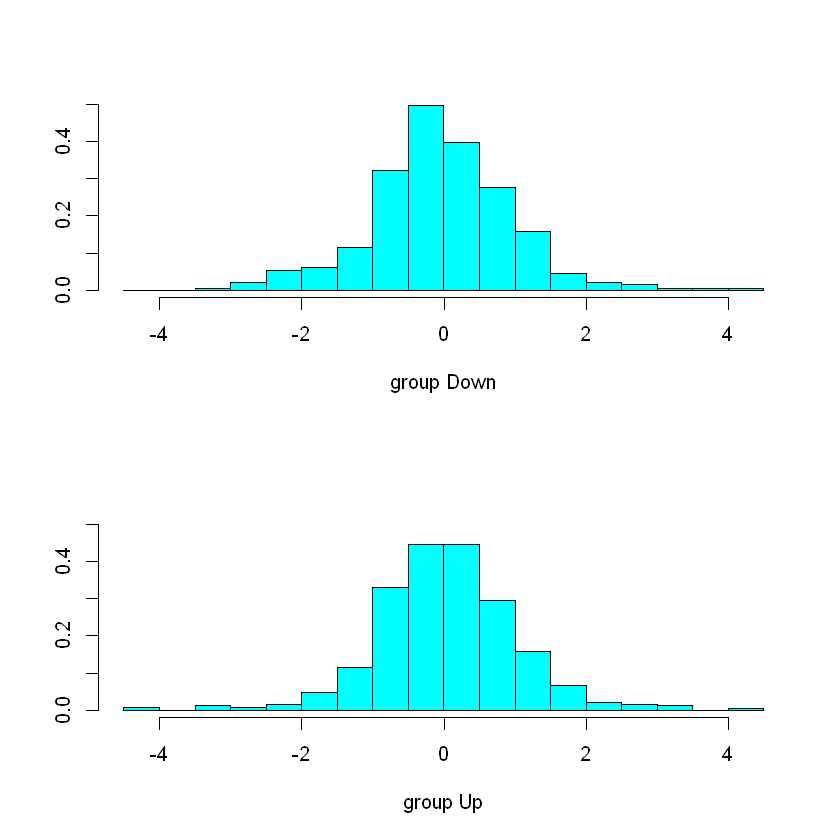

In [156]:
# Plot the lda_fit

plot(lda_fit)

The plot() function produces plots of the linear discriminants, obtained by computing −0.642×Lag1−0.514×Lag2 for each of the training observations. The Up and Down observations are displayed separately.

In [157]:
# Perform Prediction using the test data

lda_pred <- predict(lda_fit, smarket_test)

# Field names
names(lda_pred)

[1] "class"     "posterior" "x"

The predict() function returns a list with three elements. The first element, class, contains LDA’s predictions about the movement of the market. The second element, posterior, is a matrix whose kth column contains the posterior probability that the corresponding observation belongs to the kth class.

In [158]:
# Get the predicted classes from lda
lda_class <- lda_pred$class 

# Building a confusion matrix
table(lda_class, direction_test)

# Get the means
mean(lda_class == direction_test)

         direction_test
lda_class Down  Up
     Down   35  35
     Up     76 106

[1] 0.5595238

In [159]:
# Applying the same Posterior Probability cut-off
sum(lda_pred$posterior[, 1] >= 0.5)

sum(lda_pred$posterior[, 1] < 0.5)

[1] 70

[1] 182

If we wanted to use a posterior probability threshold other than 50% in order to make predictions, then we could easily do so. For instance, suppose that we wish to predict a market decrease only if we are very certain that the market will indeed decrease on that day—say, if the posterior probability is at least 90 %.

In [160]:
sum(lda_pred$posterior[, 1] > 0.9)

[1] 0

> Notice that the posterior probability output by the model corresponds to the probability that the market will *decrease*:

In [161]:
data.frame(lda_pred$posterior[1:20, 1], lda_class[1:20])



,lda_pred.posterior.1.20..1.,lda_class.1.20.
999,0.4901792,Up
1000,0.4792185,Up
1001,0.4668185,Up
1002,0.4740011,Up
1003,0.4927877,Up
1004,0.4938562,Up
1005,0.4951016,Up
1006,0.4872861,Up
1007,0.4907013,Up
1008,0.4844026,Up


## Quadratic Discriminant Analysis

In [162]:
# Fit the QDA model using the qda function from the MASS library
qda_fit <- qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train_index)

qda_fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train_index)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

The output contains the group means. But it does not contain the coefficients of the linear discriminants, because the QDA classifier involves a quadratic, rather than a linear, function of the predictors. The predict() function works in exactly the same fashion as for LDA.

In [163]:
# Perform predictions
qda_class <- predict(qda_fit, smarket_test)$class

# Get the Confusion Matrix
table(qda_class, direction_test)

mean(qda_class == direction_test)

         direction_test
qda_class Down  Up
     Down   30  20
     Up     81 121

[1] 0.5992063

Interestingly, the QDA predictions are accurate almost 60% of the time, even though the 2005 data was not used to fit the model. This level of accuracy is quite impressive for stock market data, which is known to be quite hard to model accurately. This suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression. However, we recommend evaluating this method’s performance on a larger test set before betting
that this approach will consistently beat the market!

## Naive Bayes

Naive Bayes is implemented in R using the naiveBayes() function, which is part of the e1071 library. The syntax is identical to that of lda() and qda(). By default, this implementation of the naive Bayes classifier models each quantitative feature using a Gaussian distribution. However, a kernel density method can also be used to estimate the distributions.

In [164]:
library(e1071)

nb_fit <- naiveBayes(Direction ~ Lag1 + Lag2, data = Smarket,
subset = train_index)

nb_fit



Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
    Down       Up 
0.491984 0.508016 

Conditional probabilities:
      Lag1
Y             [,1]     [,2]
  Down  0.04279022 1.227446
  Up   -0.03954635 1.231668

      Lag2
Y             [,1]     [,2]
  Down  0.03389409 1.239191
  Up   -0.03132544 1.220765


In [165]:
# Prediction with Naive Bayes
nb_class <- predict(nb_fit, smarket_test)

# Confusion Matrix
table(nb_class, direction_test)

# Accuracy
mean(nb_class == direction_test)

        direction_test
nb_class Down  Up
    Down   28  20
    Up     83 121

[1] 0.5912698

> Naive Bayes performs very well on this data, with accurate predictions over 59% of the time. This is slightly worse than QDA, but much better than LDA.

In [166]:
# Displaying Prediction Probabilities

nb_pred2 <- predict(nb_fit, smarket_test, type = "raw")

# Display first 5 rows
nb_pred2[1:5, ]

Down,Up
0.4873164,0.5126836
0.4762492,0.5237508
0.4653377,0.5346623
0.4748652,0.5251348
0.4901890,0.5098110


## K-Nearest Neighbors

We will now perform KNN using the knn() function, which is part of the class library. This function works rather differently from the other modelfitting functions that we have encountered thus far. Rather than a two-step approach in which we first fit the model and then we use the model to make predictions, knn() forms predictions using a single command.

The function requires four inputs.
1. A matrix containing the predictors associated with the training data,
labeled train.X below.
2. A matrix containing the predictors associated with the data for which
we wish to make predictions, labeled test.X below.
3. A vector containing the class labels for the training observations,
labeled train.Direction below.
4. A value for K, the number of nearest neighbors to be used by the
classifier.

In [167]:
library(class)

train_X <- cbind(Lag1, Lag2)[train_index, ]

test_X <- cbind(Lag1, Lag2)[!train_index, ]

train_direction <- Direction[train_index]

> Now the knn() function can be used to predict the market’s movement for the dates in 2005. We set a random seed before we apply knn() because if several observations are tied as nearest neighbors, then R will randomly break the tie. Therefore, a seed must be set in order to ensure reproducibility of results.

In [168]:
set.seed(1)

# Prediction with knn
knn_pred <- knn(train_X, test_X, train_direction, k = 1)


# Confusion Matrix
table(knn_pred, direction_test)

# Rate
mean(knn_pred == direction_test)

        direction_test
knn_pred Down Up
    Down   43 58
    Up     68 83

[1] 0.5

> The results using K = 1 are not very good, since only 50% of the observations are correctly predicted. Of course, it may be that K = 1 results in an overly flexible fit to the data. Below, we repeat the analysis using K = 3.

In [169]:
# Prediction with knn
knn_pred <- knn(train_X, test_X, train_direction, k = 3)


# Confusion Matrix
table(knn_pred, direction_test)

# Rate
mean(knn_pred == direction_test)

        direction_test
knn_pred Down Up
    Down   48 54
    Up     63 87

[1] 0.5357143

> The results have improved slightly. But increasing K further turns out
to provide no further improvements. It appears that for this data, QDA
provides the best results of the methods that we have examined so far.


KNN does not perform well on the Smarket data but it does often provide
impressive results. As an example we will apply the KNN approach to the
Caravan data set, which is part of the ISLR2 library. This data set includes 85
predictors that measure demographic characteristics for 5,822 individuals.
The response variable is Purchase, which indicates whether or not a given
individual purchases a caravan insurance policy. In this data set, only 6%
of people purchased caravan insurance.


In [170]:
# Get the dimension of the Caravan dataset

dim(Caravan)

[1] 5822   86

In [171]:
attach(Caravan)

summary(Purchase)

The following objects are masked from Caravan (pos = 7):

    AAANHANG, ABESAUT, ABRAND, ABROM, ABYSTAND, AFIETS, AGEZONG,
    AINBOED, ALEVEN, AMOTSCO, APERSAUT, APERSONG, APLEZIER, ATRACTOR,
    AVRAAUT, AWABEDR, AWALAND, AWAOREG, AWAPART, AWERKT, AZEILPL,
    MAANTHUI, MAUT0, MAUT1, MAUT2, MBERARBG, MBERARBO, MBERBOER,
    MBERHOOG, MBERMIDD, MBERZELF, MFALLEEN, MFGEKIND, MFWEKIND,
    MGEMLEEF, MGEMOMV, MGODGE, MGODOV, MGODPR, MGODRK, MHHUUR, MHKOOP,
    MINK123M, MINK3045, MINK4575, MINK7512, MINKGEM, MINKM30, MKOOPKLA,
    MOPLHOOG, MOPLLAAG, MOPLMIDD, MOSHOOFD, MOSTYPE, MRELGE, MRELOV,
    MRELSA, MSKA, MSKB1, MSKB2, MSKC, MSKD, MZFONDS, MZPART, PAANHANG,
    PBESAUT, PBRAND, PBROM, PBYSTAND, PFIETS, PGEZONG, PINBOED, PLEVEN,
    PMOTSCO, PPERSAUT, PPERSONG, PPLEZIER, PTRACTOR, Purchase, PVRAAUT,
    PWABEDR, PWALAND, PWAOREG, PWAPART, PWERKT, PZEILPL



No  Yes 
5474  348

Because the KNN classifier predicts the class of a given test observation by
identifying the observations that are nearest to it, the scale of the variables
matters. Variables that are on a large scale will have a much larger effect
on the distance between the observations, and hence on the KNN classifier,
than variables that are on a small scale.

A good way to handle this problem is to standardize the data so that all
standardize variables are given a mean of zero and a standard deviation of one. Then
all variables will be on a comparable scale. The scale() function does just
this. In standardizing the data, we exclude column 86, because that is the
qualitative Purchase variable.

In [172]:
# Standardizing the Caravan Dataset

standardized_X <- scale(Caravan[, -86])

Now every column of standardized.X has a standard deviation of one and
a mean of zero.
We now split the observations into a test set, containing the first 1,000
observations, and a training set, containing the remaining observations.
We fit a KNN model on the training data using K = 1, and evaluate its
performance on the test data.

In [173]:
# Hold-out the first 1000 rows for testing
test_index <- 1:1000

# Derrive the training and testing variables 
train_X <- standardized_X[-test_index, ]

test_X <- standardized_X[test_index, ]

# Derrive the test Response 
test_Y <- Purchase[test_index]

train_Y <- Purchase[-test_index]

In [174]:
# Fit the k-NN with k = 1

knn_pred <- knn(train_X, test_X, train_Y, k = 1)

# Confusion Matrix
table(knn_pred, test_Y)

# Accuracy
mean(knn_pred == test_Y)

        test_Y
knn_pred  No Yes
     No  874  49
     Yes  67  10

[1] 0.884

The vector test is numeric, with values from 1 through 1, 000. Typing
standardized.X[test, ] yields the submatrix of the data containing the
observations whose indices range from 1 to 1, 000, whereas typing
standardized.X[-test, ] yields the submatrix containing the observations
whose indices do not range from 1 to 1, 000. The KNN error rate on the
1,000 test observations is just under 12%. At first glance, this may appear
to be fairly good. However, since only 6% of customers purchased
insurance, we could get the error rate down to 6% by always predicting No
regardless of the values of the predictors!

Suppose that there is some non-trivial cost to trying to sell insurance
to a given individual. For instance, perhaps a salesperson must visit each
potential customer. If the company tries to sell insurance to a random
selection of customers, then the success rate will be only 6 %, which may
be far too low given the costs involved. Instead, the company would like
to try to sell insurance only to customers who are likely to buy it. So the
overall error rate is not of interest. Instead, the fraction of individuals that
are correctly predicted to buy insurance is of interest.

It turns out that KNN with K = 1 does far better than random guessing
among the customers that are predicted to buy insurance. Among 77 such
customers, 9, or 11.7 %, actually do purchase insurance. This is double the
rate that one would obtain from random guessing.

In [175]:
# Fraction of Individuals likely to buy

10 / (10 + 67)

[1] 0.1298701

In [176]:
# Using k = 3

# Fit the k-NN with k = 1

knn_pred <- knn(train_X, test_X, train_Y, k = 3)

# Confusion Matrix
table(knn_pred, test_Y)

# Accuracy
mean(knn_pred == test_Y)

        test_Y
knn_pred  No Yes
     No  920  54
     Yes  21   5

[1] 0.925

> Using K = 3, the success rate increases to 19 %, and with K = 5 the rate is
26.7 %. This is over four times the rate that results from random guessing.
It appears that KNN is finding some real patterns in a difficult data set!

In [177]:
# Fraction of Individuals likely to buy

5 / (21 + 5)

[1] 0.1923077

In [178]:
# Vector of k
k_seq <- 1:20

# Initialize an empty list of len(k)
accuracy_list <- rep(NULL, length(k_seq))


for (k in k_seq) {

    # Fit the k-NN with the value of k
    knn_pred <- knn(train_X, test_X, train_Y, k = k)

    # Find the Accuracy
    accuracy <- mean(knn_pred == test_Y)

    # Append result to the list
    accuracy_list <- append(accuracy_list, accuracy, after = (k - 1))

}

In [179]:
knn_results_df <- data.frame(k_seq, accuracy_list)

head(knn_results_df)

k_seq,accuracy_list
1,0.882
2,0.888
3,0.926
4,0.927
5,0.934
6,0.939


## Poisson Regression



In [180]:
# Attach Bikeshare
attach(Bikeshare)

# Get the dimensions of the data
dim(Bikeshare)

# Get the column names
names(Bikeshare)

The following objects are masked from Bikeshare (pos = 5):

    atemp, bikers, casual, day, holiday, hr, hum, mnth, registered,
    season, temp, weathersit, weekday, windspeed, workingday

The following objects are masked from Bikeshare (pos = 6):

    atemp, bikers, casual, day, holiday, hr, hum, mnth, registered,
    season, temp, weathersit, weekday, windspeed, workingday

The following objects are masked from Bikeshare (pos = 7):

    atemp, bikers, casual, day, holiday, hr, hum, mnth, registered,
    season, temp, weathersit, weekday, windspeed, workingday



[1] 8645   15

[1] "season"     "mnth"       "day"        "hr"         "holiday"   
 [6] "weekday"    "workingday" "weathersit" "temp"       "atemp"     
[11] "hum"        "windspeed"  "casual"     "registered" "bikers"

In [187]:
contrasts(Bikeshare$mnth) <- contr.treatment(12)

contrasts(Bikeshare$hr) <- contr.treatment(24)

contrasts(Bikeshare$mnth)

contrasts(Bikeshare$hr)

,2,3,4,5,6,7,8,9,10,11,12
Jan,0,0,0,0,0,0,0,0,0,0,0
Feb,1,0,0,0,0,0,0,0,0,0,0
March,0,1,0,0,0,0,0,0,0,0,0
April,0,0,1,0,0,0,0,0,0,0,0
May,0,0,0,1,0,0,0,0,0,0,0
June,0,0,0,0,1,0,0,0,0,0,0
July,0,0,0,0,0,1,0,0,0,0,0
Aug,0,0,0,0,0,0,1,0,0,0,0
Sept,0,0,0,0,0,0,0,1,0,0,0
Oct,0,0,0,0,0,0,0,0,1,0,0


,2,3,4,5,6,7,8,9,10,11,...,15,16,17,18,19,20,21,22,23,24
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
# Fit the linear regression model
lin_reg_fit <- lm(bikers ~ ., data = Bikeshare)

# Get the summary
summary(lin_reg_fit)

Warning message in summary.lm(lin_reg_fit):
"essentially perfect fit: summary may be unreliable"


Call:
lm(formula = bikers ~ ., data = Bikeshare)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.188e-12 -2.170e-14 -1.100e-15  2.040e-14  4.427e-12 

Coefficients:
                            Estimate Std. Error    t value Pr(>|t|)    
(Intercept)                9.284e-14  9.959e-15  9.322e+00  < 2e-16 ***
season                    -2.254e-14  2.364e-15 -9.532e+00  < 2e-16 ***
mnth2                      3.002e-15  6.909e-15  4.340e-01 0.663938    
mnth3                      2.052e-14  9.518e-15  2.156e+00 0.031142 *  
mnth4                      4.717e-15  1.332e-14  3.540e-01 0.723195    
mnth5                     -3.590e-14  1.699e-14 -2.113e+00 0.034625 *  
mnth6                      9.765e-15  2.093e-14  4.670e-01 0.640775    
mnth7                     -6.135e-14  2.495e-14 -2.459e+00 0.013943 *  
mnth8                      1.075e-13  2.841e-14  3.783e+00 0.000156 ***
mnth9                      1.574e-13  3.211e-14  4.901e+00 9.69e-07 ***
mnth10             

In [188]:
# Fit the linear regression model
lin_reg_fit <- lm(bikers ~ mnth + hr + workingday + temp +
weathersit, data = Bikeshare)

# Get the summary
summary(lin_reg_fit)



Call:
lm(formula = bikers ~ mnth + hr + workingday + temp + weathersit, 
    data = Bikeshare)

Residuals:
    Min      1Q  Median      3Q     Max 
-299.00  -45.70   -6.23   41.08  425.29 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -68.632      5.307 -12.932  < 2e-16 ***
mnth2                        6.845      4.287   1.597 0.110398    
mnth3                       16.551      4.301   3.848 0.000120 ***
mnth4                       41.425      4.972   8.331  < 2e-16 ***
mnth5                       72.557      5.641  12.862  < 2e-16 ***
mnth6                       67.819      6.544  10.364  < 2e-16 ***
mnth7                       45.324      7.081   6.401 1.63e-10 ***
mnth8                       53.243      6.640   8.019 1.21e-15 ***
mnth9                       66.678      5.925  11.254  < 2e-16 ***
mnth10                      75.834      4.950  15.319  < 2e-16 ***
mnth11                      60.310      4.610  13.083  < 2

Due to space constraints, we truncate the output of summary(lin_reg_fit). In
mod.lm, the first level of hr (0) and mnth (Jan) are treated as the baseline
values, and so no coefficient estimates are provided for them: implicitly,
their coefficient estimates are zero, and all other levels are measured relative
to these baselines. For example, the Feb coefficient of 6.845 signifies that,
holding all other variables constant, there are on average about 7 more
riders in February than in January. Similarly there are about 16.5 more
riders in March than in January.

In [182]:
# Changing the baseline for coded variables
contrasts(Bikeshare$hr) <- contr.sum(24)

contrasts(Bikeshare$mnth) <- contr.sum(12)

# Fit the linear regression model
lin_reg_fit2 <- lm(bikers ~ mnth + hr + workingday + temp +
weathersit, data = Bikeshare)

# Get the summary
summary(lin_reg_fit2)


Call:
lm(formula = bikers ~ mnth + hr + workingday + temp + weathersit, 
    data = Bikeshare)

Residuals:
    Min      1Q  Median      3Q     Max 
-299.00  -45.70   -6.23   41.08  425.29 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 73.5974     5.1322  14.340  < 2e-16 ***
mnth1                      -46.0871     4.0855 -11.281  < 2e-16 ***
mnth2                      -39.2419     3.5391 -11.088  < 2e-16 ***
mnth3                      -29.5357     3.1552  -9.361  < 2e-16 ***
mnth4                       -4.6622     2.7406  -1.701  0.08895 .  
mnth5                       26.4700     2.8508   9.285  < 2e-16 ***
mnth6                       21.7317     3.4651   6.272 3.75e-10 ***
mnth7                       -0.7626     3.9084  -0.195  0.84530    
mnth8                        7.1560     3.5347   2.024  0.04295 *  
mnth9                       20.5912     3.0456   6.761 1.46e-11 ***
mnth10                      29.7472     2.6995 

In lin_reg_fit2, a coefficient
estimate is reported for all but the last level of hr and mnth. Importantly,
in lin_reg_fit2, the coefficient estimate for the last level of mnth is not zero:
instead, it equals the negative of the sum of the coefficient estimates for
all of the other levels. Similarly, in mod.lm2, the coefficient estimate for the
last level of hr is the negative of the sum of the coefficient estimates for
all of the other levels. This means that the coefficients of hr and mnth in
lin_reg_fit2 will always sum to zero, and can be interpreted as the difference
from the mean level. For example, the coefficient for January of −46.087
indicates that, holding all other variables constant, there are typically 46
fewer riders in January relative to the yearly average.

In [183]:
# Fitting a Poisson Regression

pois_reg_fit <- glm(bikers ∼ mnth + hr + workingday + temp + weathersit,
data = Bikeshare, family = poisson)

summary(pois_reg_fit)


Call:
glm(formula = bikers ~ mnth + hr + workingday + temp + weathersit, 
    family = poisson, data = Bikeshare)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-20.7574   -3.3441   -0.6549    2.6999   21.9628  

Coefficients:
                           Estimate Std. Error  z value Pr(>|z|)    
(Intercept)                4.118245   0.006021  683.964  < 2e-16 ***
mnth1                     -0.670170   0.005907 -113.445  < 2e-16 ***
mnth2                     -0.444124   0.004860  -91.379  < 2e-16 ***
mnth3                     -0.293733   0.004144  -70.886  < 2e-16 ***
mnth4                      0.021523   0.003125    6.888 5.66e-12 ***
mnth5                      0.240471   0.002916   82.462  < 2e-16 ***
mnth6                      0.223235   0.003554   62.818  < 2e-16 ***
mnth7                      0.103617   0.004125   25.121  < 2e-16 ***
mnth8                      0.151171   0.003662   41.281  < 2e-16 ***
mnth9                      0.233493   0.003102   75.281 

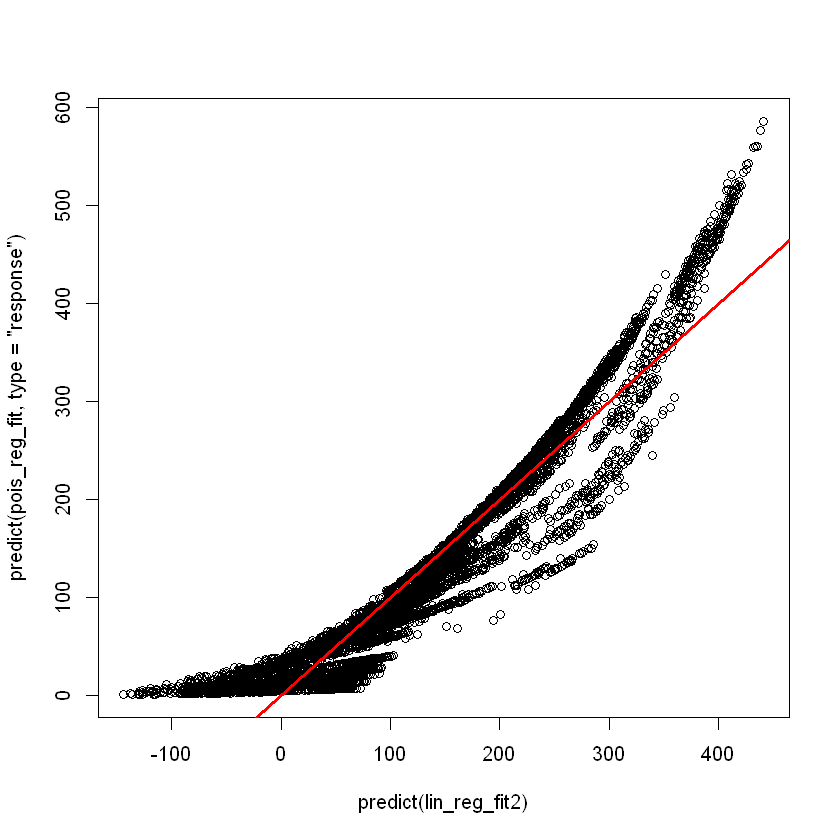

In [184]:
plot(predict(lin_reg_fit2), predict(pois_reg_fit, type = "response"))

abline(0, 1, col = 2, lwd = 3)

> The predictions from the Poisson regression model are correlated with those
from the linear model; however, the former are non-negative. As a result
the Poisson regression predictions tend to be larger than those from the
linear model for either very low or very high levels of ridership.